In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
df = fetch_ucirepo(id=46) 
  
# data (as pandas dataframes) 
X = df.data.features 
y = df.data.targets 

In [2]:
df.metadata

{'uci_id': 46,
 'name': 'Hepatitis',
 'repository_url': 'https://archive.ics.uci.edu/dataset/46/hepatitis',
 'data_url': 'https://archive.ics.uci.edu/static/public/46/data.csv',
 'abstract': 'From G.Gong: CMU; Mostly Boolean or numeric-valued attribute types; Includes cost data (donated by Peter Turney)',
 'area': 'Health and Medicine',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 155,
 'num_features': 19,
 'feature_types': ['Categorical', 'Integer', 'Real'],
 'demographics': [],
 'target_col': ['Class'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1983,
 'last_updated': 'Fri Nov 03 2023',
 'dataset_doi': '10.24432/C5Q59J',
 'creators': [],
 'intro_paper': None,
 'additional_info': {'summary': 'Please ask Gail Gong for further information on this database.',
  'purpose': None,
  'funded_by': None,
  'instances_represent': None,
  'recommended_data_splits': None,
  'sensitive_dat

In [3]:
CATEGORICAL=["Sex", "Steroid", "Antivirals", "Fatigue", "Malaise", "Anorexia", "Liver Big", "Liver Firm", "Spleen Palpable", "Spiders", "Ascites", "Varices", "Histology"]
TARGET = "Class"
NUMERICAL=["Age", "Bilirubin", "Alk Phosphate", "Sgot", "Albumin", "Protime"]

In [4]:
print("Number of rows:", X.shape[0])
X.head()

Number of rows: 155


,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


<Axes: xlabel='Class'>

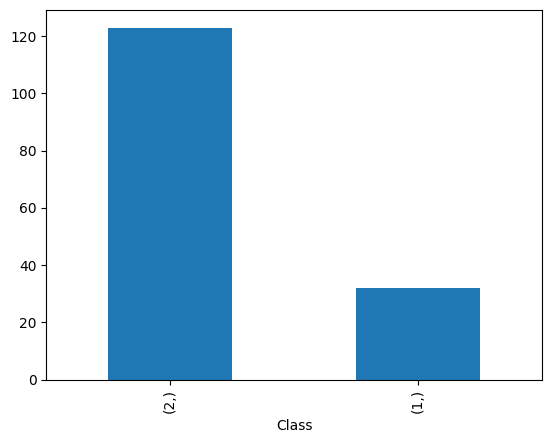

In [5]:
y.value_counts().plot(kind="bar")

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Bilirubin'}>],
       [<Axes: title={'center': 'Alk Phosphate'}>,
        <Axes: title={'center': 'Sgot'}>],
       [<Axes: title={'center': 'Albumin'}>,
        <Axes: title={'center': 'Protime'}>]], dtype=object)

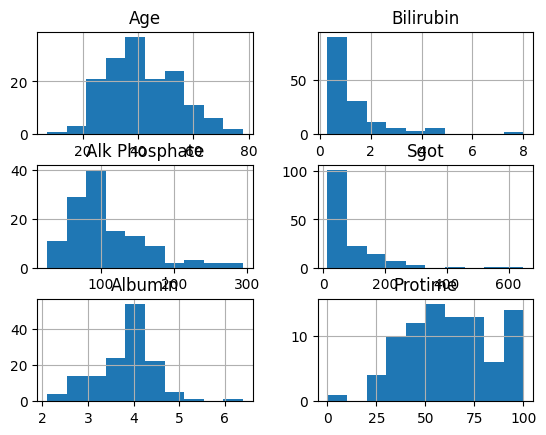

In [6]:
X[NUMERICAL].hist()

In [7]:
comb = X
comb[TARGET] = y

comb.head()

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology,Class
0,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1,2
1,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1,2
2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1,2
3,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1,2
4,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1,2


In [8]:
comb.dropna(inplace=True)
print("Number of rows:", comb.shape[0])
comb.head()
y = comb[TARGET]

Number of rows: 80


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[NUMERICAL] = scaler.fit_transform(X[NUMERICAL])

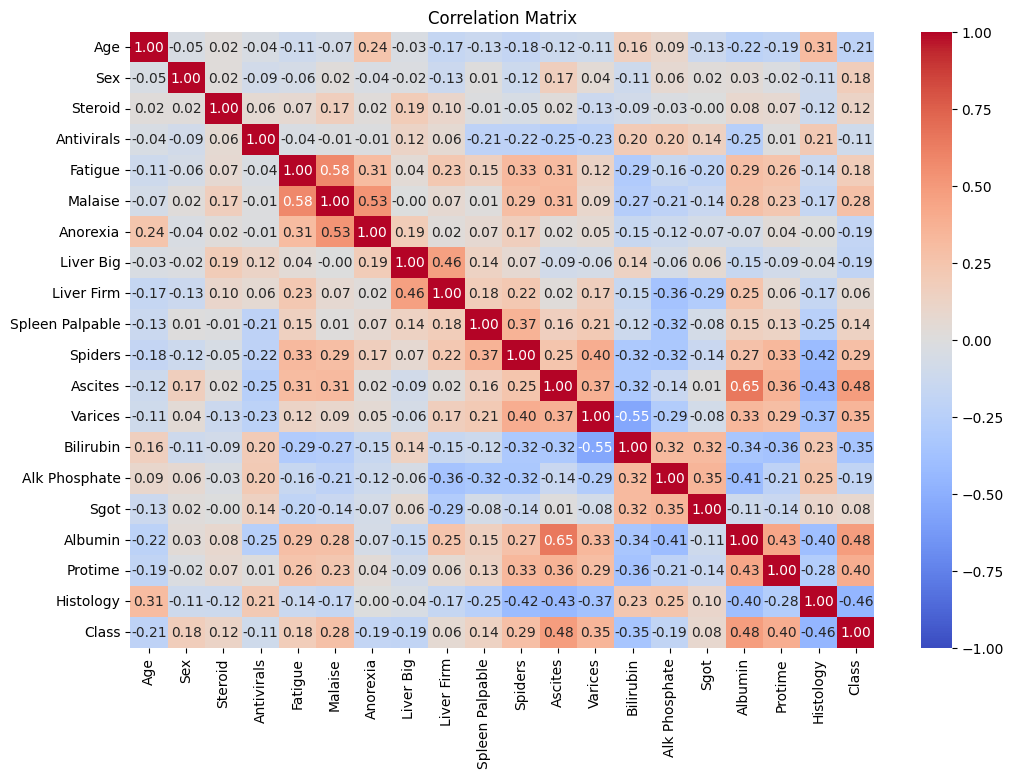

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

<Axes: >

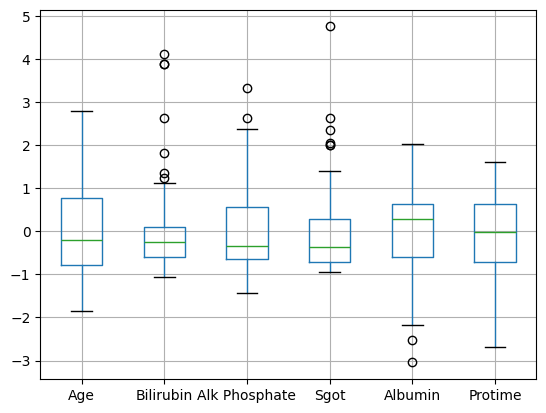

In [11]:
X[NUMERICAL].boxplot()

64


<Axes: >

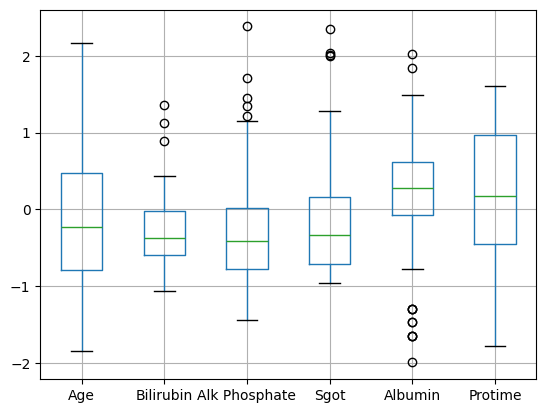

In [12]:
import numpy as np
from scipy import stats

a = X[(np.abs(stats.zscore(X)) < 2.6).all(axis=1)]
print(a.shape[0])
a[NUMERICAL].boxplot()

<Axes: xlabel='Class'>

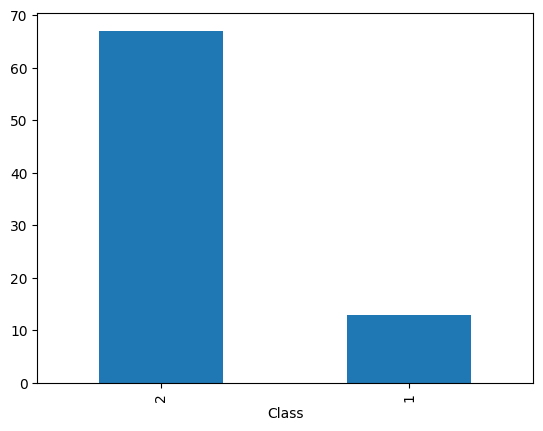

In [13]:
y.value_counts().plot(kind="bar")

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown='ignore'), CATEGORICAL+[TARGET]),
    ],
    remainder='passthrough'
)

X_encoded = preprocessor.fit_transform(X)
X_encoded

80


array([[ 1.        ,  0.        ,  0.        , ..., -0.75929992,
         0.27284058,  0.53638413],
       [ 1.        ,  0.        ,  1.        , ..., -0.73119072,
         0.97131247,  0.96592097],
       [ 1.        ,  0.        ,  0.        , ...,  2.34676733,
        -0.25101333, -0.36564324],
       ...,
       [ 1.        ,  0.        ,  1.        , ...,  1.2786175 ,
         0.62207653, -0.36564324],
       [ 0.        ,  1.        ,  1.        , ..., -0.88579135,
         0.44745855, -0.62336534],
       [ 1.        ,  0.        ,  0.        , ..., -0.88579135,
        -1.29872117, -0.88108745]], shape=(80, 34))

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4, random_state=42)

ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)
print("AdaBoost:\n", classification_report(y_test, y_pred_ada))

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)
y_pred_gbc = gbc_model.predict(X_test)
print("Gradient Boosting:\n", classification_report(y_test, y_pred_gbc))

AdaBoost:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        26

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Random Forest:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        26

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Gradient Boosting:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        26

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00    

In [53]:
feature_names = preprocessor.get_feature_names_out()

In [54]:
importances_ada = ada_model.feature_importances_
importances_rf = rf_model.feature_importances_
importances_gbc = gbc_model.feature_importances_

importances_ada /= np.sum(importances_ada)
importances_rf /= np.sum(importances_rf)
importances_gbc /= np.sum(importances_gbc)

average_importances = (importances_ada + importances_rf + importances_gbc) / 3

indices_avg = np.argsort(average_importances)[::-1]
print("Top 10 Features by Average Importance:")
for idx in indices_avg[:10]:
    print(f"{feature_names[idx]}: {average_importances[idx]:.4f}")

Top 10 Features by Average Importance:
cat__Class_2: 0.5871
cat__Class_1: 0.2542
remainder__Protime: 0.0352
remainder__Albumin: 0.0155
remainder__Bilirubin: 0.0148
remainder__Age: 0.0120
remainder__Alk Phosphate: 0.0116
remainder__Sgot: 0.0077
cat__Histology_2: 0.0072
cat__Varices_2.0: 0.0059


In [70]:
import pandas as pd

top_10_features_idx = indices_avg[:10]
top_10_features = feature_names[top_10_features_idx]

X_top_10 = pd.DataFrame(X_encoded, columns=feature_names)

X_top_10 = X_top_10[top_10_features]

X_train_top_10, X_test_top_10, y_train, y_test = train_test_split(X_top_10, y, test_size=0.3, random_state=12)

ada_model_top_10 = AdaBoostClassifier()
ada_model_top_10.fit(X_train_top_10, y_train)
y_pred_ada_top_10 = ada_model_top_10.predict(X_test_top_10)
print("AdaBoost:\n", classification_report(y_test, y_pred_ada_top_10))

rf_model_top_10 = RandomForestClassifier()
rf_model_top_10.fit(X_train_top_10, y_train)
y_pred_rf_top_10 = rf_model_top_10.predict(X_test_top_10)
print("Random Forest:\n", classification_report(y_test, y_pred_rf_top_10))

gbc_model_top_10 = GradientBoostingClassifier()
gbc_model_top_10.fit(X_train_top_10, y_train)
y_pred_gbc_top_10 = gbc_model_top_10.predict(X_test_top_10)
print("Gradient Boosting:\n", classification_report(y_test, y_pred_gbc_top_10))

AdaBoost:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        20

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

Random Forest:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        20

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

Gradient Boosting:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        20

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00    